In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
 df = pd.read_csv("/Users/macbookpro/Desktop/finalproject_test/data.csv")
df.head()

,bandwidth_kurtosis,bandwidth_max,bandwidth_mean,bandwidth_min,bandwidth_skew,bandwidth_std,centroid_kurtosis,centroid_max,centroid_mean,centroid_min,...,rolloff_min,rolloff_skew,rolloff_std,tempo,zcr_kurtosis,zcr_max,zcr_mean,zcr_min,zcr_skew,zcr_std
0,15.728413,3127.804419,924.022766,530.787219,3.109947,276.349377,81.652454,4152.928614,533.912001,228.475668,...,236.865234,6.623690,629.159847,143.554688,15.002529,0.146484,0.021693,0.002930,2.751115,0.012410
1,0.640590,3061.178902,1786.756940,682.002835,0.408394,396.731127,6.639450,4905.066343,1336.345127,332.349734,...,279.931641,0.842114,1461.572335,172.265625,19.538952,0.418945,0.050875,0.005859,3.218617,0.037547
2,-0.586341,3044.319037,2058.722850,1296.529066,-0.158019,284.884028,0.623761,3832.217325,1882.974111,897.011872,...,2024.121094,0.078506,948.782365,135.999178,1.413769,0.279297,0.085808,0.012695,1.005574,0.038846
3,-0.556997,3022.158360,2344.425465,1799.020763,0.267317,252.881890,0.580264,3743.754684,2190.158923,1179.204485,...,2863.916016,0.140800,843.422143,135.999178,1.581888,0.245117,0.092566,0.021484,0.867973,0.033331
4,-0.329522,2779.259953,2206.842904,1672.152918,0.105622,196.199955,-0.002103,3304.639988,2295.994755,1276.000803,...,2497.851562,-0.217421,789.671372,123.046875,-0.156643,0.230469,0.123847,0.043945,0.148016,0.029218


In [3]:
 y = df["label"]
target_names = ["negative", "positive"]

In [4]:
X = df.drop("label", axis=1)
X.head()

,bandwidth_kurtosis,bandwidth_max,bandwidth_mean,bandwidth_min,bandwidth_skew,bandwidth_std,centroid_kurtosis,centroid_max,centroid_mean,centroid_min,...,rolloff_min,rolloff_skew,rolloff_std,tempo,zcr_kurtosis,zcr_max,zcr_mean,zcr_min,zcr_skew,zcr_std
0,15.728413,3127.804419,924.022766,530.787219,3.109947,276.349377,81.652454,4152.928614,533.912001,228.475668,...,236.865234,6.623690,629.159847,143.554688,15.002529,0.146484,0.021693,0.002930,2.751115,0.012410
1,0.640590,3061.178902,1786.756940,682.002835,0.408394,396.731127,6.639450,4905.066343,1336.345127,332.349734,...,279.931641,0.842114,1461.572335,172.265625,19.538952,0.418945,0.050875,0.005859,3.218617,0.037547
2,-0.586341,3044.319037,2058.722850,1296.529066,-0.158019,284.884028,0.623761,3832.217325,1882.974111,897.011872,...,2024.121094,0.078506,948.782365,135.999178,1.413769,0.279297,0.085808,0.012695,1.005574,0.038846
3,-0.556997,3022.158360,2344.425465,1799.020763,0.267317,252.881890,0.580264,3743.754684,2190.158923,1179.204485,...,2863.916016,0.140800,843.422143,135.999178,1.581888,0.245117,0.092566,0.021484,0.867973,0.033331
4,-0.329522,2779.259953,2206.842904,1672.152918,0.105622,196.199955,-0.002103,3304.639988,2295.994755,1276.000803,...,2497.851562,-0.217421,789.671372,123.046875,-0.156643,0.230469,0.123847,0.043945,0.148016,0.029218


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.644
k: 3, Train/Test Score: 0.804/0.636
k: 5, Train/Test Score: 0.801/0.656
k: 7, Train/Test Score: 0.773/0.620
k: 9, Train/Test Score: 0.744/0.636
k: 11, Train/Test Score: 0.741/0.632
k: 13, Train/Test Score: 0.740/0.620
k: 15, Train/Test Score: 0.728/0.616
k: 17, Train/Test Score: 0.723/0.616
k: 19, Train/Test Score: 0.699/0.612


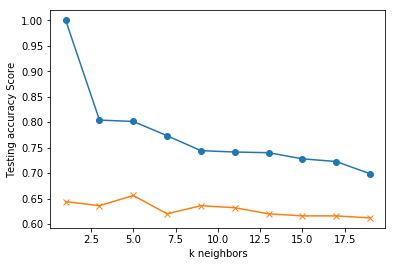

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
 # Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.620
